# Lapped Transform

Lapped DCT and IDCT

In [2]:
import numpy as np

from scipy.fft import dctn, idctn
from matplotlib import pyplot as plt
from matplotlib import pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (12, 12)

import mdct

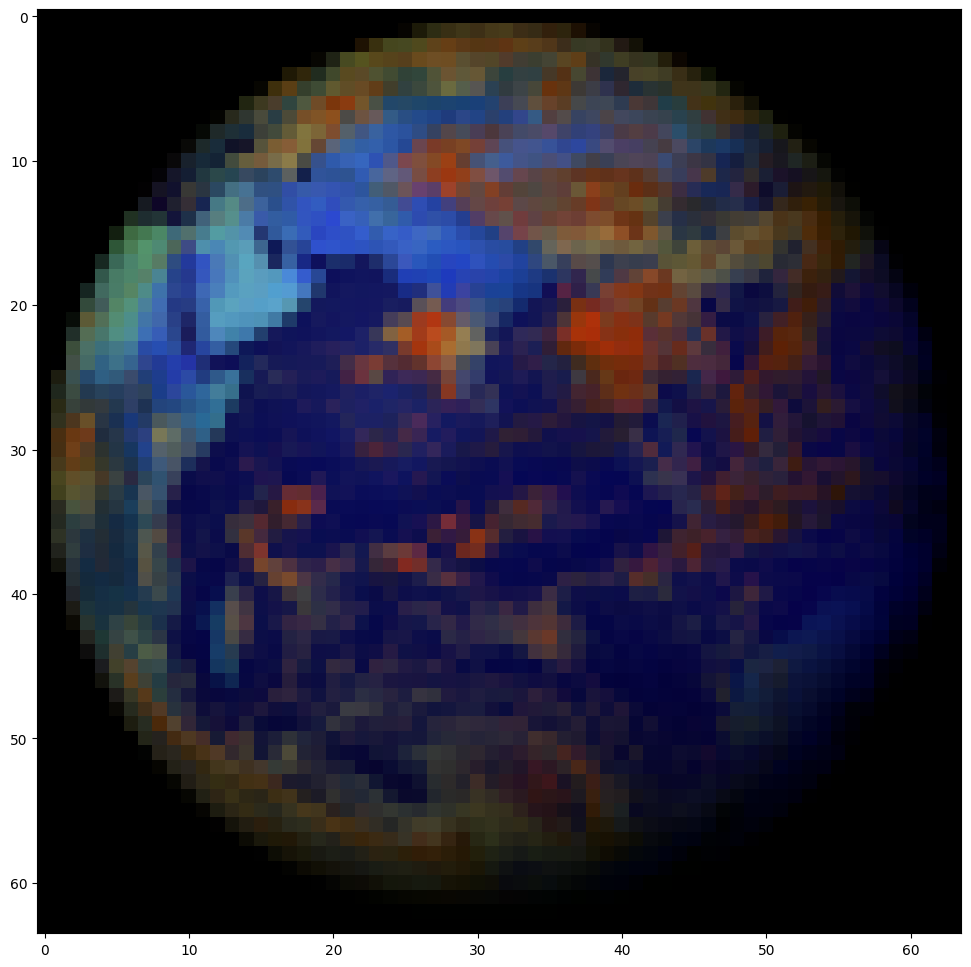

In [3]:
im = plt.imread("images/earth-64.png")

plt.figure()
plt.imshow(im)

In [4]:
# Make image greyscale
im = (im[:,:,0] + im[:,:,1] + im[:,:,2])/3

# Make image dimensions multiples of 8
im = im[:im.shape[0] - im.shape[0]%8, :im.shape[1] - im.shape[1]%8]

# Convert image from 0-1 float to 0-255 uint8
# This is optional. Comment out to have lossless round trip.
if im.dtype == np.float32:
    im = np.rint(im * 255/im.max()).astype(np.uint8)

(64, 64)


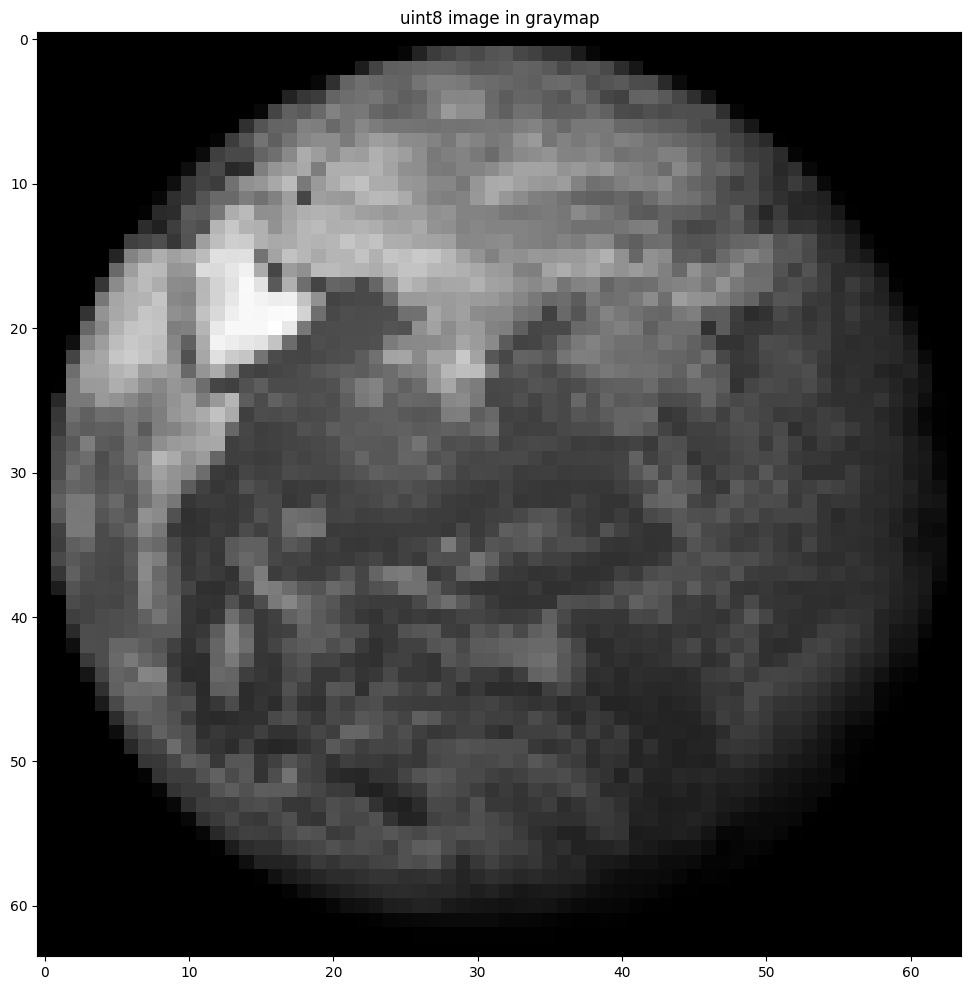

In [5]:
plt.figure()
plt.imshow(im, cmap='gray')
plt.title("uint8 image in graymap")

print(im.shape)

In [6]:
dct = mdct.mdct(im, framelength=64)

TypeError: Invalid shape (32, 3, 64) for image data

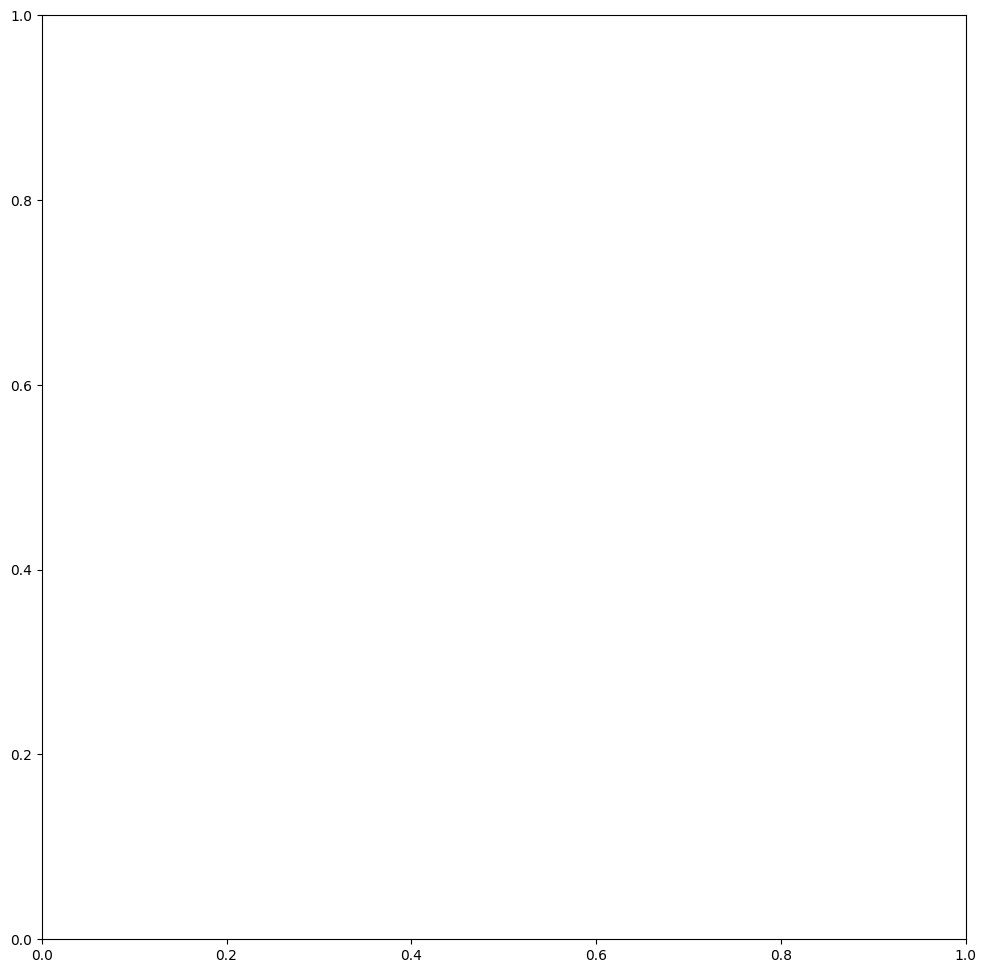

In [7]:
plt.figure()
plt.imshow(dct, cmap='gray', vmax=np.max(dct)*0.08, vmin=0)
plt.title("8x8 DCTs of the image")

In [ ]:
image_dct = np.zeros(im.shape)

# Do 8x8 DCT on image (in-place)
for i in np.r_[:im.shape[0]:8]:
    for j in np.r_[:im.shape[1]:8]:
        print(dct[i:(i+8), j:(j+8)])
        image_dct[i:(i+8),j:(j+8)] = mdct.imdct(dct[i:(i+8), j:(j+8)])

In [ ]:
plt.figure()
plt.imshow(image_dct, cmap='gray')
plt.title("Image reconstructed from DCTs")

In [ ]:
plt.figure()
plt.imshow( np.hstack( (im, image_dct) ), cmap='gray')
plt.title("Comparison: Image and Image_DCT" )